# Summary
||||||||||||||||||||||||||||||||||||||||

IEEE Computational Intelligence Society · Research Prediction

Fraud Detection

|||||||||||||||||||||||||||||||||||||||||

# Packages

In [1]:
!pip install feature-engine ppscore

In [2]:
!pip install -U gdown

In [6]:
!pip install -U gdown

   ---------------------------------------- 0.0/187.3 kB ? eta -:--:--
   ------ --------------------------------- 30.7/187.3 kB 1.3 MB/s eta 0:00:01
   ------------ -------------------------- 61.4/187.3 kB 656.4 kB/s eta 0:00:01
   -------------------- ----------------- 102.4/187.3 kB 590.8 kB/s eta 0:00:01
   ------------------------ ------------- 122.9/187.3 kB 654.9 kB/s eta 0:00:01
   -------------------------------------  184.3/187.3 kB 743.9 kB/s eta 0:00:01
   -------------------------------------- 187.3/187.3 kB 567.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Nora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from pathlib import Path

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew, kurtosis
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import gdown

import ppscore as pps

## Data manipulation

In [12]:
plt.style.use('ggplot')  #Applique un style de graphique proche de ggplot2 (R).
%matplotlib inline
#Affiche les graphiques directement dans le notebook.

pd.set_option('display.max_rows', 500)   # Affiche jusqu'à 500 lignes
pd.set_option('display.max_columns', 500)  # Affiche jusqu'à 500 colonnes
pd.set_option('display.width', 1000)     # Largeur d'affichage


In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Data

In [3]:
# Entrer le chemin d'accès correspondant à votre machine
HOME_DIR = r"C:\Users\HP\Desktop\LESLYE\ISEP2\S2\MACHINE_LEARNING\01-ieee-fraud-detection" #charger le chemin d'acces

In [6]:
# Charger l'id du télechargement du fichier
identity_id = '13NCfbgLHeRWeash0r1p0rv8x4oX4tq4I'

output_identity = 'identity.csv'  # charger le nom du fichier

#télécharger le fichier
gdown.download(f'https://drive.google.com/uc?id={identity_id}', output_identity, quiet=False)

# Charger le fichier téléchargé
identitys = pd.read_csv(output_identity)

Downloading...
From: https://drive.google.com/uc?id=13NCfbgLHeRWeash0r1p0rv8x4oX4tq4I
To: C:\Users\HP\Desktop\LESLYE\ISEP2\S2\MACHINE_LEARNING\01-ieee-fraud-detection\1_notebooks\identity.csv
100%|█████████████████████████████████████████████████████████████████████████████| 26.5M/26.5M [00:10<00:00, 2.52MB/s]


In [7]:
# lien d'accès à la base transaction https://drive.google.com/file/d/1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9/view?usp=sharing

# Charger l'id du télechargement du fichier
transaction_id = '1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9'

output_transaction = 'transaction.csv'  # charger le nom du fichier

#télécharger le fichier
gdown.download(f'https://drive.google.com/uc?id={transaction_id}', output_transaction, quiet=False)

# Charger le fichier téléchargé
transactions = pd.read_csv(output_transaction)

Downloading...
From (original): https://drive.google.com/uc?id=1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9
From (redirected): https://drive.google.com/uc?id=1UZUyZmSj5Jc-Ha71Zb0OdtKP2wvmOiW9&confirm=t&uuid=56907b24-3c8b-4586-beeb-3fd6ed4baf51
To: C:\Users\HP\Desktop\LESLYE\ISEP2\S2\MACHINE_LEARNING\01-ieee-fraud-detection\1_notebooks\transaction.csv
100%|███████████████████████████████████████████████████████████████████████████████| 683M/683M [04:43<00:00, 2.41MB/s]


MemoryError: Unable to allocate 1.65 GiB for an array with shape (376, 590540) and data type float64

In [ ]:
# Fusionner les données
data = pd.merge(transaction, identity, on="TransactionID", how="left")

In [11]:
data.shape

(590540, 434)

In [14]:
# Liste des variables à convertir definies par vesta
categorical_vars = ['DeviceType', 'id_12', 'ProductCD', 'card1', 'card2', 'card3',
                    'card4', 'card5', 'card6', 'addr1', 'P_emaildomain']

# Conversion en type 'category'
data[categorical_vars] = data[categorical_vars].astype('category')

In [15]:
# Nombre total de cellules dans la base
total_cells = data.size

# Nombre total de valeurs manquantes
total_missing = data.isnull().sum().sum()

# Pourcentage global de valeurs manquantes
missing_pct_total = (total_missing / total_cells) * 100

print(f"Pourcentage global de valeurs manquantes : {missing_pct_total:.2f}%")

Pourcentage global de valeurs manquantes : 45.07%


In [16]:
# leave one 'addr' variable out
from scipy.stats import chi2_contingency


chi2_scores = []
p_values = []
cramer_vs =[]

contingency_table = pd.crosstab(data['addr1'],data['addr2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_scores.append(chi2)
p_values.append(p)
cramer_v = np.sqrt(chi2 / (contingency_table.shape[0] * (min(contingency_table.shape) - 1)))
cramer_vs.append(cramer_v)

print(chi2)
print(p)

11073558.163938586
0.0


In [17]:
# 1. Configuration des colonnes à supprimer
colonnes_a_supprimer = [
    'TransactionID', 'addr2', 'dist1', 'dist2',
    'R_emaildomain','DeviceType', 'DeviceInfo'
]

# 2. Ajout des colonnes D
d_cols = [f'D{i}' for i in range(1, 16) if f'D{i}' not in ['D1', 'D10', 'D15']]
colonnes_a_supprimer += d_cols

# 3. Ajout des colonnes M
m_cols = [f'M{i}' for i in range(1, 10)]
colonnes_a_supprimer += m_cols

# 4. Colonnes V avec +15% de NA (à calculer dynamiquement)
class VDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.v_cols_ = [col for col in X.columns
                       if col.startswith('V')
                       and X[col].isna().mean() > 0.15]
        return self

    def transform(self, X):
        return X.drop(columns=self.v_cols_)

# 5. Colonnes ID
id_cols = [col for col in data.columns
          if col.startswith('id_')
          and col not in ['id_01', 'id_12']]
colonnes_a_supprimer += id_cols

# 6. Pipeline final
preprocessor = Pipeline([
    ('v_dropper', VDropper()),
    ('feature_dropper', DropFeatures(features_to_drop=list(set(colonnes_a_supprimer))))
])


In [18]:
# Utilisation
df_clean = preprocessor.fit_transform(data)

In [19]:
del data
del identity
del transaction

In [20]:
df_clean.shape

(590540, 162)

In [21]:
#Strategy = fill missing values of id_12 by undefined
def preprocess_id12(df_clean):
    # Add 'undefined' to the categories of id_12
    df_clean['id_12'] = df_clean['id_12'].cat.add_categories(['undefined'])
    # Now you can fill NaN values with 'undefined'
    processed_df_clean = df_clean.assign(
        id_12=lambda df: df['id_12'].fillna('undefined')
    )
    return processed_df_clean



In [22]:
# Utilisation
df_clean = preprocess_id12(df_clean)

In [23]:
df_clean.id_12.value_counts()

id_12
undefined    446307
NotFound     123025
Found         21208
Name: count, dtype: int64

In [24]:
df_clean.isnull().mean()

isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card2             0.015127
card3             0.002650
card4             0.002670
card5             0.007212
card6             0.002660
addr1             0.111264
P_emaildomain     0.159949
C1                0.000000
C2                0.000000
C3                0.000000
C4                0.000000
C5                0.000000
C6                0.000000
C7                0.000000
C8                0.000000
C9                0.000000
C10               0.000000
C11               0.000000
C12               0.000000
C13               0.000000
C14               0.000000
D1                0.002149
D10               0.128733
D15               0.150901
V12               0.128819
V13               0.128819
V14               0.128819
V15               0.128819
V16               0.128819
V17               0.128819
V18               0.128819
V19               0.128819
V

## Imputation


In [25]:
# 3. Imputation des valeurs manquantes restantes
num_vars = df_clean.select_dtypes(include=['number'])
missing_percent = num_vars.isnull().mean() * 100

result = pd.DataFrame({
    'Variable': missing_percent.index,
    'MissingPercent': missing_percent.round(5)
})

print("\nAvant imputation :")
print(result)

for col in result['Variable']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.info()


Avant imputation :
                      Variable  MissingPercent
isFraud                isFraud         0.00000
TransactionDT    TransactionDT         0.00000
TransactionAmt  TransactionAmt         0.00000
C1                          C1         0.00000
C2                          C2         0.00000
C3                          C3         0.00000
C4                          C4         0.00000
C5                          C5         0.00000
C6                          C6         0.00000
C7                          C7         0.00000
C8                          C8         0.00000
C9                          C9         0.00000
C10                        C10         0.00000
C11                        C11         0.00000
C12                        C12         0.00000
C13                        C13         0.00000
C14                        C14         0.00000
D1                          D1         0.21489
D10                        D10        12.87330
D15                        D15        15

In [26]:
df_clean["P_emaildomain"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 590540 entries, 0 to 590539
Series name: P_emaildomain
Non-Null Count   Dtype   
--------------   -----   
496084 non-null  category
dtypes: category(1)
memory usage: 579.3 KB


In [27]:
# 1. Liste des colonnes à traiter
card_cols = [f'card{i}' for i in range(1, 7)]+['addr1']
by_missing = ['id_12']

# 2. Traitement des variables card (mode)
for col in card_cols:
    if col in df_clean.columns:
        # Conversion en catégoriel
        df_clean[col] = df_clean[col].astype('category')
        
        # Calcul du mode (premier élément si égalité)
        mode_val = df_clean[col].mode()[0] 
        
        # Imputation
        df_clean[col] = df_clean[col].fillna(mode_val)

# 3. Traitement spécifique de id_12 (missing)
for col in by_missing:
    if col in df_clean.columns:
    # Conversion en catégoriel + ajout catégorie
        df_clean[col] = (
            df_clean[col]
            .astype('category')
            .cat.add_categories('missing')
            .fillna('missing')
        )

## Processing

## category 

In [23]:
# categories
# transformer p_email


class EmailDomainGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=15):
        self.top_n = top_n
        self.top_domains_ = None

    def fit(self, X, y=None):
        self.top_domains_ = X['P_emaildomain'].value_counts().nlargest(self.top_n).index
        return self

    def transform(self, X):
        # Access the 'P_emaildomain' column as a Series
        column = X['P_emaildomain']

        # Add 'unknown' to categories before filling NaNs
        if 'unknown' not in column.cat.categories:
            column = column.cat.add_categories(['unknown'])
        column = column.fillna('unknown')

        # Apply the domain grouping logic
        X['P_emaildomain'] = column.apply(lambda x: x if x in self.top_domains_ else 'Others')
        return X

In [24]:
class EmailDomainGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=15):
        self.top_n = top_n
        self.top_domains_ = None

    def fit(self, X, y=None):
        self.top_domains_ = X['P_emaildomain'].value_counts().nlargest(self.top_n).index
        return self

    def transform(self, X):
        X = X.copy()  # éviter les effets de bord
        column = X['P_emaildomain']

        if 'unknown' not in column.cat.categories:
            column = column.cat.add_categories(['unknown'])

        column = column.fillna('unknown')  # remplacer les NaN

        column = column.apply(lambda x: x if x in self.top_domains_ else 'Others')  # regrouper
        X['P_emaildomain'] = column  # réaffecter
        return X


In [25]:
# creer le frequency encoder pour le pipeline

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.freq_dicts = {}

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)
        X = X.copy()
        for col in self.columns:
            freq = X[col].value_counts(normalize=True)
            self.freq_dicts[col] = freq
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.columns)
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.freq_dicts[col]).fillna(0)
        return X
    
    def get_feature_names_out(self, input_features=None):
        # Renvoie les noms des colonnes transformées
        return np.array(self.columns)

In [26]:
# Variables catégorielles par type d'encodage

low_card_cat_features = ['card4', 'card6', 'ProductCD']
high_card_cat_features = ['P_emaildomain']

In [27]:
# Pipeline pour id_12
id12_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation avec la modalité la plus fréquente (NotFound)
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # OneHot avec suppression d'une colonne pour éviter la multicolinéarité
])

# Pipeline faible cardinalité (OneHot)
low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline forte cardinalité
high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('frequency_encoder', FrequencyEncoder(columns=high_card_cat_features))
])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ('id12', id12_transformer, ['id_12']),
    ('low_card', low_card_transformer, low_card_cat_features),
    ('high_card', high_card_transformer, high_card_cat_features)
],
remainder='passthrough'
)

In [29]:
preprocessor.fit(df_clean)
df_clean_1 = preprocessor.transform(df_clean)

C:\Users\Nora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




ColumnTransformer(remainder='passthrough',
                  transformers=[('id12',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['id_12']),
                                ('low_card',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['card4', 'card6', 'ProductCD']),
                                ('high_card',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('frequency_encoder',
                                                  FrequencyEncoder(columns=['P_emaildomain']))]),
                                 ['P_emaildomain'])])

C:\Users\Nora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.



In [30]:

columns = preprocessor.get_feature_names_out()

print(columns)


['id12__id_12_NotFound' 'id12__id_12_undefined' 'low_card__card4_discover'
 'low_card__card4_mastercard' 'low_card__card4_visa'
 'low_card__card6_credit' 'low_card__card6_debit'
 'low_card__card6_debit or credit' 'low_card__ProductCD_H'
 'low_card__ProductCD_R' 'low_card__ProductCD_S' 'low_card__ProductCD_W'
 'high_card__P_emaildomain' 'remainder__isFraud'
 'remainder__TransactionDT' 'remainder__TransactionAmt' 'remainder__card1'
 'remainder__card2' 'remainder__card3' 'remainder__card5'
 'remainder__addr1' 'remainder__C1' 'remainder__C2' 'remainder__C3'
 'remainder__C4' 'remainder__C5' 'remainder__C6' 'remainder__C7'
 'remainder__C8' 'remainder__C9' 'remainder__C10' 'remainder__C11'
 'remainder__C12' 'remainder__C13' 'remainder__C14' 'remainder__D1'
 'remainder__D10' 'remainder__D15' 'remainder__V12' 'remainder__V13'
 'remainder__V14' 'remainder__V15' 'remainder__V16' 'remainder__V17'
 'remainder__V18' 'remainder__V19' 'remainder__V20' 'remainder__V21'
 'remainder__V22' 'remainder__V23

In [31]:
df_clean_1 = pd.DataFrame(df_clean_1, columns=columns)

In [32]:
df_clean_1.columns = [col.split('__')[-1] for col in df_clean_1.columns]


In [33]:
df_clean_1

,id_12_NotFound,id_12_undefined,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.159949,0.0,86400.0,68.50,13926.0,321.0,150.0,142.0,315.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-5.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.386688,0.0,86401.0,29.00,2755.0,404.0,150.0,102.0,325.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-5.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.008629,0.0,86469.0,59.00,4663.0,490.0,150.0,166.0,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-5.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.170918,0.0,86499.0,50.00,18132.0,567.0,150.0,117.0,476.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [34]:
df_clean_1.isnull().any().all()

np.False_

## numerics

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew, kurtosis
import pandas as pd


In [36]:
# 1. Sélection des variables numériques de `data`
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()

# 2. Choix du scaler en fonction de la distribution
scaler_mapping = {}

for col in num_cols:
    col_data = pd.to_numeric(df_clean_1[col], errors='coerce').dropna()
    if col_data.nunique() <= 1:
        continue  # Trop peu de variation, inutile de scaler

    skewness = skew(col_data)
    kurt = kurtosis(col_data)
    
    if abs(skewness) < 1 and abs(kurt) < 3:
        scaler_mapping[col] = StandardScaler()
    elif abs(skewness) > 2 or abs(kurt) > 5:
        scaler_mapping[col] = RobustScaler()
    else:
        scaler_mapping[col] = MinMaxScaler()

# 3. Construction du ColumnTransformer
transformers = [
    (f"{col}_scaler", scaler, [col]) for col, scaler in scaler_mapping.items()
]

column_transformer = ColumnTransformer(transformers=transformers)

# 4. Pipeline général (ici uniquement pour la mise à l’échelle)
preprocessing_pipeline = Pipeline([
    ('scaling', column_transformer)
])

# 5. Application du pipeline à `data`
scaled_array = preprocessing_pipeline.fit_transform(df_clean_1)

# 6. Création du DataFrame des variables standardisées
df_scaled = pd.DataFrame(
    scaled_array,
    columns=[f"{col}_scaled" for col in scaler_mapping],
    index=df_clean_1.index
)

# Optionnel : fusionner avec les autres colonnes non numériques
df_final = pd.concat([df_clean_1.drop(columns=scaler_mapping.keys()), df_scaled], axis=1)

# Affichage
print("Dimensions du DataFrame final :", df_final.shape)
print(df_final.head())

Dimensions du DataFrame final : (590540, 170)
   id_12_NotFound  id_12_undefined  card4_discover  card4_mastercard  card4_visa  card6_credit  card6_debit  card6_debit or credit  ProductCD_H  ProductCD_R  ProductCD_S  ProductCD_W  P_emaildomain    card1  card2  card3  card5  addr1  isFraud_scaled  TransactionDT_scaled  TransactionAmt_scaled  C1_scaled  C2_scaled  C3_scaled  C4_scaled  C5_scaled  C6_scaled  C7_scaled  C8_scaled  C9_scaled  C10_scaled  C11_scaled  C12_scaled  C13_scaled  C14_scaled  D1_scaled  D10_scaled  D15_scaled  V12_scaled  V13_scaled  V14_scaled  V15_scaled  V16_scaled  V17_scaled  V18_scaled  V19_scaled  V20_scaled  V21_scaled  V22_scaled  V23_scaled  V24_scaled  V25_scaled  V26_scaled  V27_scaled  V28_scaled  V29_scaled  V30_scaled  V31_scaled  V32_scaled  V33_scaled  V34_scaled  V53_scaled  V54_scaled  V55_scaled  V56_scaled  V57_scaled  V58_scaled  V59_scaled  V60_scaled  V61_scaled  V62_scaled  V63_scaled  V64_scaled  V65_scaled  V66_scaled  V67_scaled  V68_sca

### ACP

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
df_clean_1.isnull().any().all()

np.False_

In [39]:
col_v = df_clean_1.loc[:, df_clean_1.columns.str.startswith('V')]

In [40]:
X_scaled = pd.DataFrame(col_v, columns=col_v.columns)

In [41]:

# Choisir automatiquement le nombre de composantes pour expliquer 95 % de la variance
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

# Afficher le nombre retenu
print(f"Nombre de composantes sélectionnées : {pca.n_components_}")

Nombre de composantes sélectionnées : 4


In [42]:
# Afficher la variance expliquée par chaque composante retenue
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Tableau résumé
explained_df = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(explained_var))],
    'Variance expliquée (%)': explained_var * 100,
    'Cumulée (%)': cumulative_var * 100
})

print(explained_df)

  Composante  Variance expliquée (%)  Cumulée (%)
0        PC1               95.256978    95.256978
1        PC2                2.025753    97.282731
2        PC3                1.157275    98.440006
3        PC4                0.727935    99.167941


<Figure size 800x500 with 0 Axes>

([<matplotlib.axis.XTick at 0x1ee7ceb1950>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

Text(0.5, 0, 'Composante principale')

Text(0, 0.5, 'Variance expliquée (%)')

Text(0.5, 1.0, 'Variance expliquée par les composantes principales')

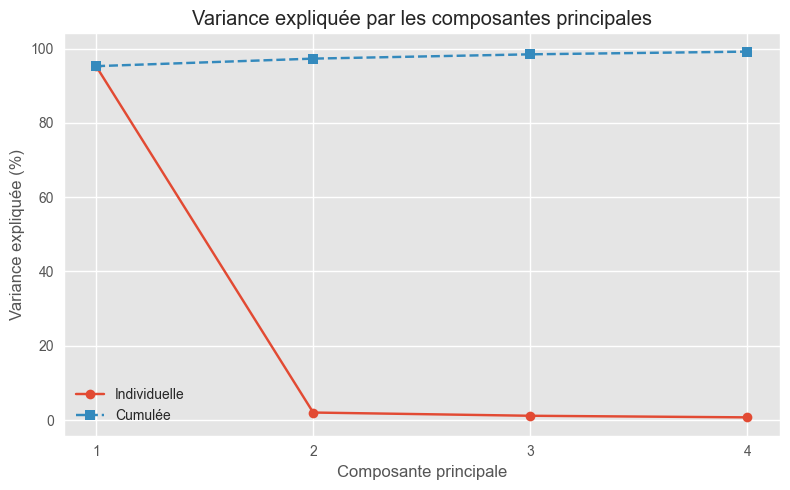

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var * 100, 'o-', label="Individuelle")
plt.plot(range(1, len(cumulative_var)+1), cumulative_var * 100, 's--', label="Cumulée")
plt.xticks(range(1, len(explained_var)+1))
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée (%)")
plt.title("Variance expliquée par les composantes principales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=df_clean.index)

In [45]:
df_pca

,PC1,PC2,PC3,PC4
0,-578.792272,-11.577656,-29.839293,159.394133
1,-752.638216,-103.872889,-26.135370,127.865175
2,-752.638224,-103.872885,-26.135382,127.865122
3,2567.731609,1061.704694,709.692063,290.458991
4,-752.638189,-103.872835,-26.135395,127.865140
...,...,...,...,...
590535,-713.994481,-79.752182,-15.353113,100.359515
590536,-752.638224,-103.872885,-26.135382,127.865122
590537,-752.638231,-103.872912,-26.135382,127.865137
590538,2036.792596,2158.812694,-1004.332485,-120.192870


In [47]:
v_columns = [col for col in df_clean_1.columns if col.startswith('V')]

df_remainder = df_clean_1.drop(columns=v_columns)


In [48]:
df_final = pd.concat([df_remainder, df_pca], axis=1)


In [49]:
df_final.isnull().any().all()

np.False_

In [51]:
df_final.to_csv('data_clean.csv', index=False)

In [ ]:
import os


# Chemin d'accès
folder_path = "0_data"


# Enregistrer le fichier CSV
df_final.to_csv(f"{HOME_DIR}/{folder_path}/data_clean.csv", index=False)